# Importing the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# inspecting the dataset

In [4]:
df=pd.read_csv('youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
df.shape

(1000, 9)

In [6]:
df.dtypes

Rank            int64
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [7]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


# Cleaning data

### removing columns that we are not going to use

In [8]:
df.drop(['Links','Rank'],axis=1,inplace=True)

### adding a column that contains the continent of each country

In [9]:
continent_dict = {
    'India': 'Asia',
    'Estados Unidos': 'North America',
    'Brasil': 'South America',
    'México': 'North America',
    'Rusia': 'Europe/Asia',  # Russia lies in both continents
    'Pakistán': 'Asia',
    'Indonesia': 'Asia',
    'Francia': 'Europe',
    'Colombia': 'South America',
    'Iraq': 'Asia',
    'Filipinas': 'Asia',
    'Argentina': 'South America',
    'Turquía': 'Europe/Asia',  # Turkey lies in both continents
    'Tailandia': 'Asia',
    'Arabia Saudita': 'Asia',
    'Bangladesh': 'Asia',
    'Reino Unido': 'Europe',
    'Perú': 'South America',
    'España': 'Europe',
    'Egipto': 'Africa',
    'Jordania': 'Asia',
    'Marruecos': 'Africa',
    'Singapur': 'Asia',
    'Argelia': 'Africa',
    'Japón': 'Asia',
    'Somalia': 'Africa'
}

# Add the continent column based on the dictionary
df['Continent'] = df['Country'].map(continent_dict)

### Translating the value of countries to English

In [10]:
Country_translations = {
    'India': 'India',  # Assuming it's already in English
    'Estados Unidos': 'United States',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Indonesia': 'Indonesia',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Filipinas': 'Philippines',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Tailandia': 'Thailand',
    'Arabia Saudita': 'Saudi Arabia',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Perú': 'Peru',
    'España': 'Spain',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Argelia': 'Algeria',
    'Japón': 'Japan',
    'Somalia': 'Somalia'
}

# Replace country values with translations based on the dictionary
df['Country'] = df['Country'].replace(Country_translations)

### Translating Categories to English

In [11]:
Categories_translation = {
     'Música y baile': 'Music and Dance',
    'Videojuegos, Humor': 'Video Games, Humor',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-Help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Humor': 'Humor',
    'Educación': 'Education',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Shows',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-Help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Animação, Juguetes': 'Animation, Toys',
    'Juguetes': 'Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}
df['Categories'] = df['Categories'].replace(Categories_translation)

### Dealing with null values

In [12]:
df.isnull().sum()

Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Continent     173
dtype: int64

<AxesSubplot:>

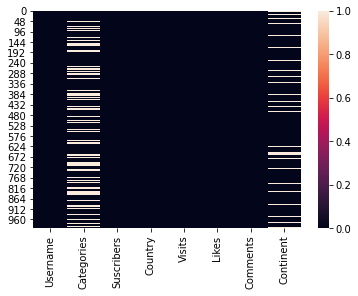

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.dropna(inplace=True)

### Dealing with duplicate values

In [15]:
df.duplicated().any()

True

In [16]:
df=df.drop_duplicates()

# Exploratory Data Analysis

### Top 10 streamers according to nuber of subscribers

<AxesSubplot:xlabel='Username', ylabel='Suscribers'>

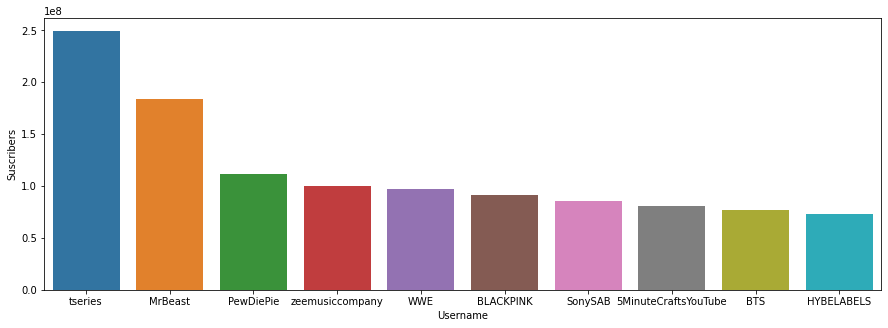

In [17]:
top_10_subs=df.sort_values(by='Suscribers',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x='Username',y='Suscribers',data=top_10_subs)

##### tseries is the highest channel according to subscribers

### The number of subscribers according to each category

<AxesSubplot:xlabel='Categories'>

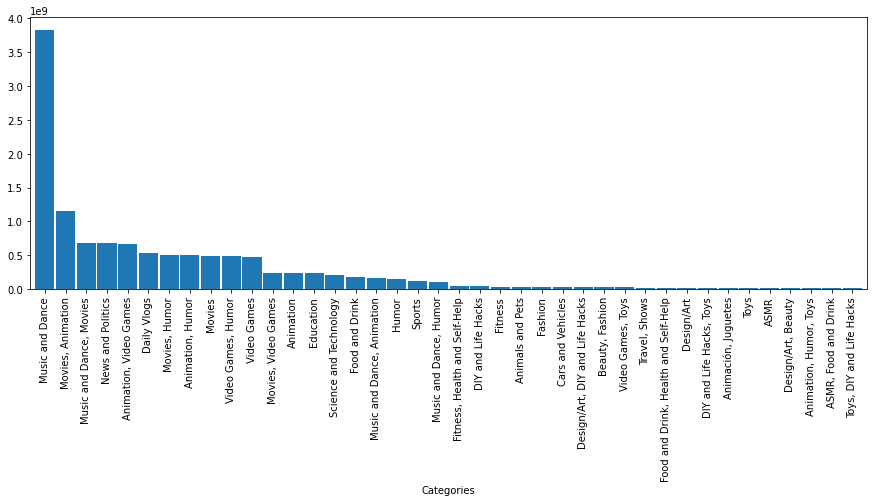

In [18]:
df.groupby('Categories')['Suscribers'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,5),width=0.92)

#### Music and dance is the category with the highest number of subscribers

### Which Country has the largest number of streamers?

### replacing the unkown country with the most common value

In [19]:
mode_value = df['Country'].mode()[0]
df['Country'].replace('Unknown',mode_value,inplace=True)

([<matplotlib.patches.Wedge at 0x1216cdab0d0>,
 [Text(0.22718881766217502, 1.076283067380168, 'United States'),
  Text(-1.0632303759246071, -0.2820304375616554, 'India'),
  Text(-0.35502249250027507, -1.0411335312143646, 'Brazil'),
  Text(0.2530797728566719, -1.070490835351156, 'Mexico'),
  Text(0.685097655310029, -0.8606051374984354, 'Indonesia'),
  Text(0.9207876116218665, -0.6017891443717632, 'Russia'),
  Text(1.0264225463746015, -0.3955461493857313, 'Colombia'),
  Text(1.071248970108307, -0.24985124382698512, 'Philippines'),
  Text(1.0927886005620238, -0.12575004764092143, 'Thailand'),
  Text(1.0995000854443517, -0.033159645774095074, 'Argentina')],
 [Text(0.12392117327027727, 0.5870634912982734, '43.4%'),
  Text(-0.579943841413422, -0.1538347841245393, '21.5%'),
  Text(-0.1936486322728773, -0.567891017026017, '9.8%'),
  Text(0.13804351246727556, -0.5839040920097214, '8.1%'),
  Text(0.37368963016910667, -0.4694209840900556, '6.0%'),
  Text(0.5022477881573817, -0.32824862420277995, 

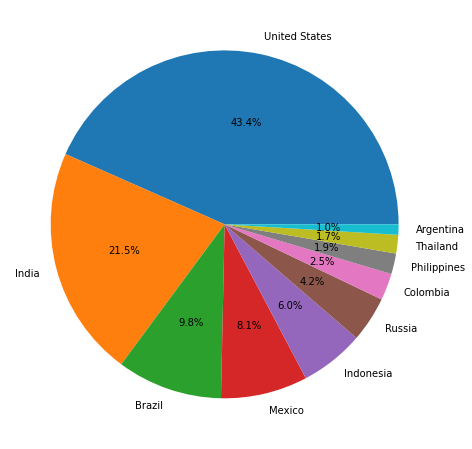

In [20]:
top_10_countries=df['Country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%1.1f%%")

#### USA is the country with most streamers

### Exploring corelations

<AxesSubplot:>

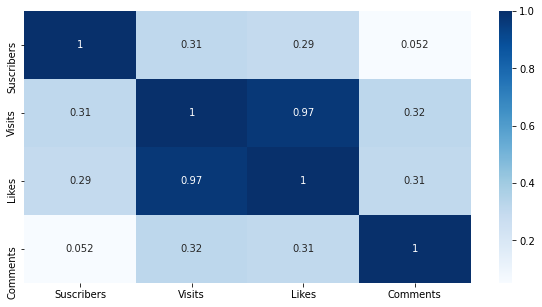

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

#### As the streamer gets more views, the number of likes he gets increases

### Is there a relationship between the number of streamers in a country and the average number of views per streamer in that country?


In [22]:
correlation = df.groupby('Country')['Visits'].mean().corr(df.groupby('Country')['Username'].count())
correlation

0.1751022416511797

#### The results showed a weak positive correlation, indicating a slight tendency for countries with more streamers to also have a higher average viewership per streamer.

###  Distribution of channels in top 10 categories

Text(0.5, 1.0, 'Distribution of channels in top 10 categories')

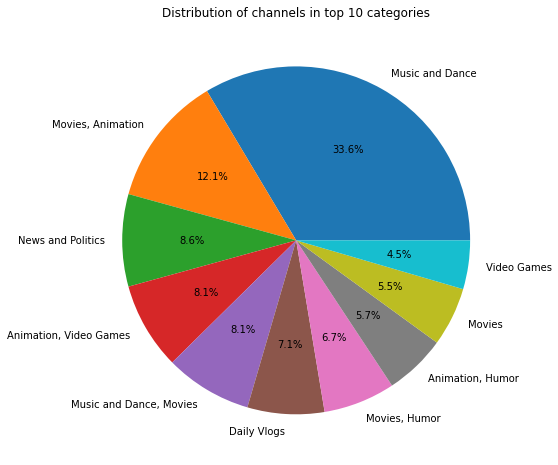

In [23]:
top_10_categories=df['Categories'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct="%1.1f%%")
plt.title('Distribution of channels in top 10 categories')

#### Music and dance is the category with the highest number of streamers

### Do certain streamers tend to have more likes relative to their views?

<AxesSubplot:xlabel='Username'>

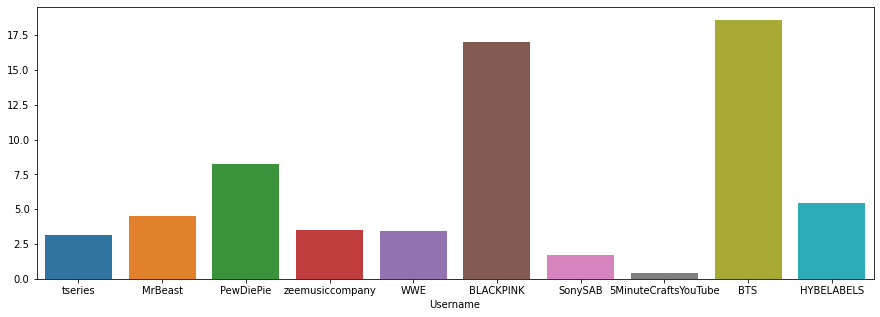

In [24]:
top_10_subs=df.sort_values(by='Suscribers',ascending=False).head(10) #top 10 youtubers according to number of subscribers
like_view_ratio=(top_10_subs['Likes']/top_10_subs['Visits'])*100     # ratio between number of likes the streamer get and the views
plt.figure(figsize=(15,5))
sns.barplot(x='Username',y=like_view_ratio,data=top_10_subs)


### Tseries channel has the highest number of subscribers (as we knew from the graph at the start of our EDA) but it has the smallest like to view ratio among the top 10 channels. This might mean that  music video content often tend to generate fewer likes relative to views compared to other content types like gaming or comedy commentary. People might enjoy listening to the music without necessarily feeling compelled to like this kind of content. On the other hand, BlackPink channel has the smallest number of subscriber but it has the highest like to view ratio. This might mean that BlackPink has a small group of fans relative to other channels but this channel has a very dedicated fan community who actively like and share their videos. This could be due to factors like the group's image, their music style, or the way they interact with fans.

### Distribution of streamers across countries within each continent

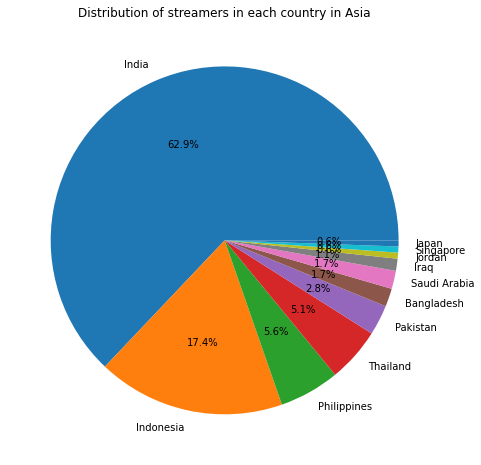

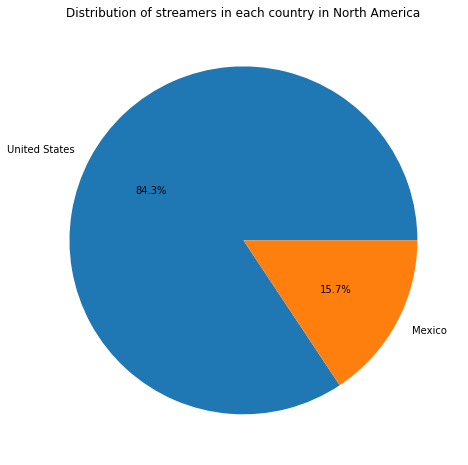

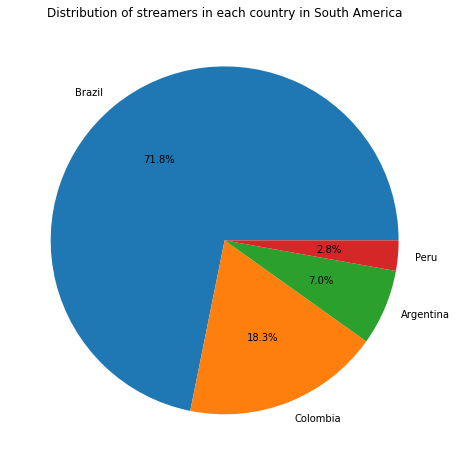

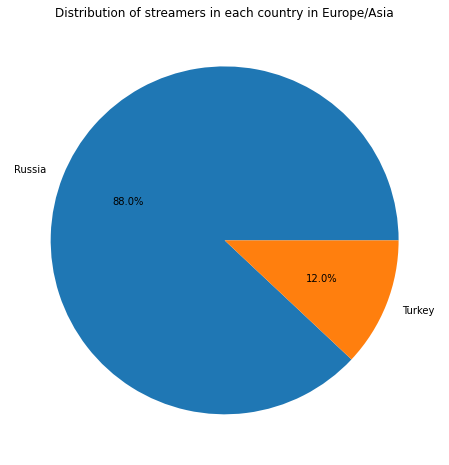

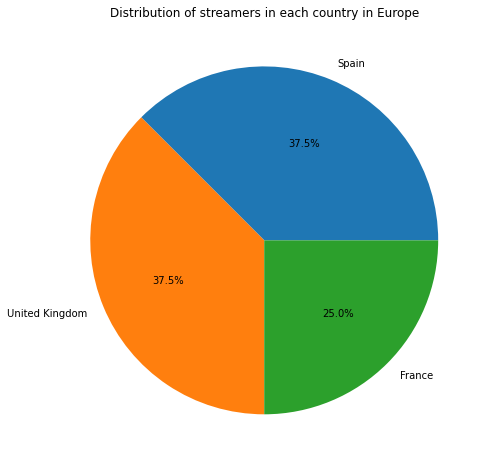

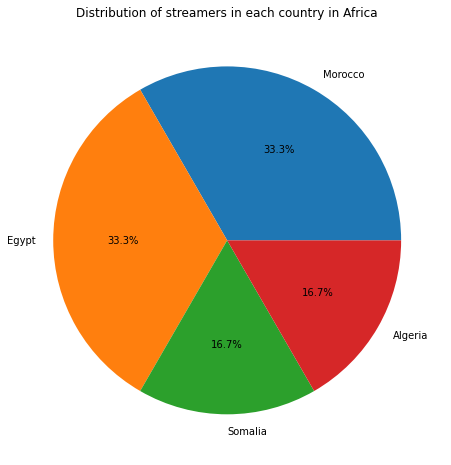

In [25]:
def plot_streamer_distribution_per_continent(df):
  unique_continents = df['Continent'].unique()

  # Iterate through unique continents
  for continent in unique_continents:
    
    country_frequency_per_continent = (df[df['Continent'] == continent]
                                      ['Country'].value_counts().sort_values(ascending=False))

    # Create a pie chart for the current continent
    plt.figure(figsize=(8, 8))  
    plt.title(f'Distribution of streamers in each country in {continent}')
    plt.pie(country_frequency_per_continent, labels=country_frequency_per_continent.index, autopct="%1.1f%%")
    

plot_streamer_distribution_per_continent(df)

### The number of subscribers from each Country

<AxesSubplot:xlabel='Country'>

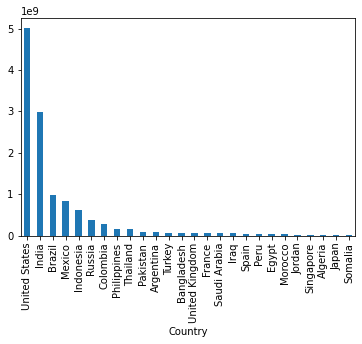

In [26]:
df.groupby('Country')['Suscribers'].sum().sort_values(ascending=False).plot(kind='bar')

#### Content creators from the USA have a massive global audience

# Benchmarking

#### Who are the top performing Streamers?

In [27]:
lists_columns=['Suscribers', 'Visits', 'Likes', 'Comments']
average_by_categories = df[lists_columns].mean()

# Filter for streamers above average in ALL metrics
above_average_streamers = df[
    (df['Suscribers']>average_by_categories['Suscribers'])&
    (df['Visits']>average_by_categories['Visits'])&
    (df['Likes']>average_by_categories['Likes'])&
    (df['Comments']>average_by_categories['Comments'])
    
]

# Select Username, Subscribers, and Visits for top performers
top_performing_creators = above_average_streamers[['Username', 'Suscribers', 'Visits','Comments']]

# Sort by Subscribers in descending order (top to bottom)
top_performing_creators = top_performing_creators.sort_values(by='Suscribers', ascending=False)
top_performing_creators

,Username,Suscribers,Visits,Comments
1,MrBeast,183500000.0,117400000.0,18500.0
5,PewDiePie,111500000.0,2400000.0,4900.0
26,dudeperfect,59700000.0,5300000.0,4200.0
34,TaylorSwift,54100000.0,4300000.0,15000.0
39,JuegaGerman,48600000.0,2000000.0,3000.0
43,A4a4a4a4,47300000.0,9700000.0,22000.0
62,KimberlyLoaiza,42100000.0,5300000.0,16000.0
96,TotalGaming093,36300000.0,1500000.0,4900.0
100,markiplier,35500000.0,2100000.0,3800.0
122,AboFlah,32700000.0,3300000.0,11400.0
